### Best ModelTitanic

<li> Goal is to build a model with AUC >=.874

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [4]:
data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [5]:
y = data.pop("Survived")

In [6]:
data = data.drop(['PassengerId','Ticket'], axis=1)

In [7]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S
5,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,E46,S
7,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,NaN,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,NaN,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30.0708,NaN,C


### First choice of variables for Logistic Regression
Looking at the data the information sex, age, pclass, sibsp, parch, fare, and embarked are the only variable that can easily be used as either a continuous or categorical variable

In [8]:
X = pd.DataFrame()
X['sex'] = data['Sex']
X['age'] = data['Age']
X['pclass'] = data['Pclass']
X['sibsp'] = data['SibSp']
X['parch'] = data['Parch']
X['fare'] = data['Fare']
#X['survived'] = df['Survived']
#X['embarked'] = data['Embarked']
X['name'] = data["Name"]
#X['cabin'] = data['Cabin']
#X['ticket'] = data ['Ticket']

In [9]:
X

,sex,age,pclass,sibsp,parch,fare,name
0,male,22,3,1,0,7.2500,"Braund, Mr. Owen Harris"
1,female,38,1,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,female,26,3,0,0,7.9250,"Heikkinen, Miss. Laina"
3,female,35,1,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,male,35,3,0,0,8.0500,"Allen, Mr. William Henry"
5,male,NaN,3,0,0,8.4583,"Moran, Mr. James"
6,male,54,1,0,0,51.8625,"McCarthy, Mr. Timothy J"
7,male,2,3,3,1,21.0750,"Palsson, Master. Gosta Leonard"
8,female,27,3,0,2,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,female,14,2,1,0,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)"


<li> Seperate names by the variable Mr. Mrs. Master. Miss. and disregard other titles

In [10]:
def clean_name(x):
    try:
        if "Mr." in x:
            return 0
        elif "Mrs." in x:
            return 1
        elif "Master." in x:
            return 2
        elif "Miss." in x:
            return 3
        else:
            return 4
    except TypeError:
        return "Error"

In [11]:
X["name"] = X.name.apply(clean_name)

In [12]:
X

,sex,age,pclass,sibsp,parch,fare,name
0,male,22,3,1,0,7.2500,0
1,female,38,1,1,0,71.2833,1
2,female,26,3,0,0,7.9250,3
3,female,35,1,1,0,53.1000,1
4,male,35,3,0,0,8.0500,0
5,male,NaN,3,0,0,8.4583,0
6,male,54,1,0,0,51.8625,0
7,male,2,3,3,1,21.0750,2
8,female,27,3,0,2,11.1333,1
9,female,14,2,1,0,30.0708,1


In [13]:
X.name.value_counts()

0    517
3    182
1    125
2     40
4     27
Name: name, dtype: int64

<li> Only 27 names did not contain one of those values and were give a dummy variable 

### First Look
<li>Survived will be dropped as the dependent variable
<li>Sex and Embarked values will need to be replaced with 1 and 0
<li>Age values need to cleaned to either remove NaN values of replace with an avg


In [14]:
pd.get_dummies(X.sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [15]:
#removing one gender to prevent colinear variables
X['sex'] = pd.get_dummies(X.sex)['female']

In [16]:
X

,sex,age,pclass,sibsp,parch,fare,name
0,0,22,3,1,0,7.2500,0
1,1,38,1,1,0,71.2833,1
2,1,26,3,0,0,7.9250,3
3,1,35,1,1,0,53.1000,1
4,0,35,3,0,0,8.0500,0
5,0,NaN,3,0,0,8.4583,0
6,0,54,1,0,0,51.8625,0
7,0,2,3,3,1,21.0750,2
8,1,27,3,0,2,11.1333,1
9,1,14,2,1,0,30.0708,1


In [17]:
X.columns

Index([u'sex', u'age', u'pclass', u'sibsp', u'parch', u'fare', u'name'], dtype='object')

### Data Clean
<li> Age will be averaged with counterparts of the same sex, passenger class, and name title

In [18]:
X['age'][(X.age.isnull() == True) & (X.pclass == 3) & (X.sex == 1) & (X.name ==1)]  = X.age[(X.age.isnull() == False) & (X.sex == 1) & (X.pclass == 3 & (X.name ==1))].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
X['age'][(X.age.isnull() == True) & (X.pclass == 3) & (X.sex == 1) & (X.name ==3)]  = X.age[(X.age.isnull() == False) & (X.sex == 1) & (X.pclass == 3)& (X.name ==3)].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
X['age'][(X.age.isnull() == True) & (X.pclass == 3) & (X.sex == 0)& (X.name ==0)]  = X.age[(X.age.isnull() == False) & (X.sex == 0) & (X.pclass == 3)& (X.name ==0)].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
X['age'][(X.age.isnull() == True) & (X.pclass == 3) & (X.sex == 0) & (X.name ==2)]  = X.age[(X.age.isnull() == False) & (X.sex == 0) & (X.pclass == 3)&(X.name ==2) ].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
X['age'][(X.age.isnull() == True) & (X.pclass == 2) & (X.sex == 1) & (X.name ==1)]  = X.age[(X.age.isnull() == False) & (X.sex == 1) & (X.pclass ==2) & (X.name ==1)].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
X['age'][(X.age.isnull() == True) & (X.pclass == 2) & (X.sex == 1) & (X.name ==3)]  = X.age[(X.age.isnull() == False) & (X.sex == 1) & (X.pclass ==2) & (X.name ==3)].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
X['age'][(X.age.isnull() == True) & (X.pclass == 2) & (X.sex == 0) & (X.name ==0)]  = X.age[(X.age.isnull() == False) & (X.sex == 0) & (X.pclass ==2) & (X.name ==0)].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
X['age'][(X.age.isnull() == True) & (X.pclass == 2) & (X.sex == 0) & (X.name ==2)]  = X.age[(X.age.isnull() == False) & (X.sex == 0) & (X.pclass ==2) & (X.name ==2)].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
X['age'][(X.age.isnull() == True) & (X.pclass == 1) & (X.sex == 1) & (X.name ==1)]  = X.age[(X.age.isnull() == False) & (X.sex == 1) & (X.pclass ==1 & (X.name ==1))].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
X['age'][(X.age.isnull() == True) & (X.pclass == 1) & (X.sex == 1) & (X.name ==3)]  = X.age[(X.age.isnull() == False) & (X.sex == 1) & (X.pclass ==1 & (X.name ==3))].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
X['age'][(X.age.isnull() == True) & (X.pclass == 1) & (X.sex == 0) & (X.name ==0)]  = X.age[(X.age.isnull() == False) & (X.sex == 0) & (X.pclass ==1) & (X.name ==0)].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
X['age'][(X.age.isnull() == True) & (X.pclass == 1) & (X.sex == 0) & (X.name ==2)]  = X.age[(X.age.isnull() == False) & (X.sex == 0) & (X.pclass ==1) & (X.name ==2)].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
X

,sex,age,pclass,sibsp,parch,fare,name
0,0,22.000000,3,1,0,7.2500,0
1,1,38.000000,1,1,0,71.2833,1
2,1,26.000000,3,0,0,7.9250,3
3,1,35.000000,1,1,0,53.1000,1
4,0,35.000000,3,0,0,8.0500,0
5,0,28.724891,3,0,0,8.4583,0
6,0,54.000000,1,0,0,51.8625,0
7,0,2.000000,3,3,1,21.0750,2
8,1,27.000000,3,0,2,11.1333,1
9,1,14.000000,2,1,0,30.0708,1


In [31]:
X[X['age'].isnull()]

,sex,age,pclass,sibsp,parch,fare,name
766,0,NaN,1,0,0,39.6,4


<li> One hold out that we will average only by class and sex

In [32]:
X['age'][(X.age.isnull() == True) & (X.pclass == 1) & (X.sex == 0)]  = X.age[(X.age.isnull() == False) & (X.sex == 0) & (X.pclass ==1)].mean()

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
X = X.join(pd.get_dummies(X.pclass))
X = X.drop(['pclass', 1], axis= 1)
X

,sex,age,sibsp,parch,fare,name,2,3
0,0,22.000000,1,0,7.2500,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0
2,1,26.000000,0,0,7.9250,3,0,1
3,1,35.000000,1,0,53.1000,1,0,0
4,0,35.000000,0,0,8.0500,0,0,1
5,0,28.724891,0,0,8.4583,0,0,1
6,0,54.000000,0,0,51.8625,0,0,0
7,0,2.000000,3,1,21.0750,2,0,1
8,1,27.000000,0,2,11.1333,1,0,1
9,1,14.000000,1,0,30.0708,1,1,0


In [34]:
def clean_column(x):
    try:
        if x == 0 :
            return 0
        else: 
            return 1
    except TypeError:
        return "None"

In [35]:
X["sibsp"] = X.sibsp.apply(clean_column)

In [36]:
X["parch"] = X.parch.apply(clean_column)

In [37]:
X

,sex,age,sibsp,parch,fare,name,2,3
0,0,22.000000,1,0,7.2500,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0
2,1,26.000000,0,0,7.9250,3,0,1
3,1,35.000000,1,0,53.1000,1,0,0
4,0,35.000000,0,0,8.0500,0,0,1
5,0,28.724891,0,0,8.4583,0,0,1
6,0,54.000000,0,0,51.8625,0,0,0
7,0,2.000000,1,1,21.0750,2,0,1
8,1,27.000000,0,1,11.1333,1,0,1
9,1,14.000000,1,0,30.0708,1,1,0


In [38]:
#X = X.drop(['name'], axis= 1)
X.columns

Index([u'sex', u'age', u'sibsp', u'parch', u'fare', u'name', 2, 3], dtype='object')

In [39]:
### Grid Search
n_estimators = [100, 200, 500, 1000]
max_features = ['auto', 'sqrt', 'log2', 0.9, 0.2]
min_samples_split = [3,5,7,9]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [40]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state= 42)

In [41]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2', 0.9, 0.2], 'n_estimators': [100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [42]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
best_rfc = estimator.best_estimator_

In [44]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       105
          1       0.81      0.77      0.79        74

avg / total       0.83      0.83      0.83       179



In [45]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.918018018018


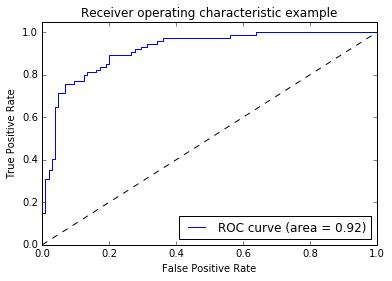

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Best Score so far .918

In [47]:
best_rfc.feature_importances_

array([ 0.21617376,  0.19112124,  0.02083876,  0.02092013,  0.26061666,
        0.18305507,  0.02520957,  0.08206482])

C:\Users\Ad\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


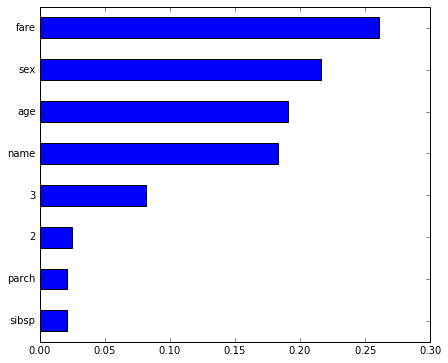

In [48]:
feature_importances = pd.Series(best_rfc.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

### Final Results
<li> The name title vastly improved the precision and recall
<li> Building sub categories for averaging improved the model
<li> AUC: .918
<li> Fare became a more signifigant variable
